# Worksheet 05

Name:  Emily Opresnick

UID: U91979014 

### Topics

- Cost Functions
- Kmeans

### Cost Function

Solving Data Science problems often starts by defining a metric with which to evaluate solutions were you able to find some. This metric is called a cost function. Data Science then backtracks and tries to find a process / algorithm to find solutions that can optimize for that cost function.

For example suppose you are asked to cluster three points A, B, C into two non-empty clusters. If someone gave you the solution `{A, B}, {C}`, how would you evaluate that this is a good solution?

Notice that because the clusters need to be non-empty and all points must be assigned to a cluster, it must be that two of the three points will be together in one cluster and the third will be alone in the other cluster.

In the above solution, if A and B are closer than A and C, and B and C, then this is a good solution. The smaller the distance between the two points in the same cluster (here A and B), the better the solution. So we can define our cost function to be that distance (between A and B here)!

The algorithm / process would involve clustering together the two closest points and put the third in its own cluster. This process optimizes for that cost function because no other pair of points could have a lower distance (although it could equal it).

### K means

a) (1-dimensional clustering) Walk through Lloyd's algorithm step by step on the following dataset:

`[0, .5, 1.5, 2, 6, 6.5, 7]` (note: each of these are 1-dimensional data points)

Given the initial centroids:

`[0, 2]`

All points will be assigned to its closest centroid:

[0: .5] [2: 1.5, 2, 6, 6.5, 7]

Next, calculate the centroid of these points 

[0.5 + 0] /2 = 0.25   [1.5 + 2 + 6 + 6.5 + 7]/5  = 4.6

Now regroup based off of the new centroid:

[0.25: 0, 0.5, 1.5, 2]  [4.6: 6, 6,5, 7]

calculate the centroid:

1 and 6.5

this will stay the same when regrouping and reassigning therefore the algorithm stops





b) Describe in plain english what the cost function for k means is.

the cost function for k means would be the sum of the distances from the k clusters to their respective centroid (center).

c) For the same number of clusters K, why could there be very different solutions to the K means algorithm on a given dataset?

There could be different solutions based off of te random centroids chosen at the begining of the algorithm

d) Does Lloyd's Algorithm always converge? Why / why not?

Yes the alorgithm will always converge as it is impossible for it to loop. This is because the points in a cluster are grouped based off of their minium distance which only can become smaller in each iteration.

e) Follow along in class the implementation of Kmeans

TypeError: list indices must be integers or slices, not tuple

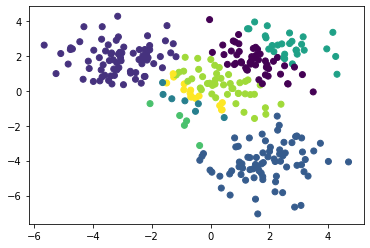

In [14]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0], [2, 2], [-3, 2], [2, -4]]
X, _ = datasets.make_blobs(n_samples=300, centers=centers, cluster_std=1, random_state=0)

class KMeans():

    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.assignment = [-1 for _ in range(len(data))]
        self.snaps = []
    
    def snap(self, centers):
        TEMPFILE = "temp.png"

        fig, ax = plt.subplots()
        ax.scatter(X[:, 0], X[:, 1], c=self.assignment)
        ax.scatter(centers[:,0], centers[:, 1], c='r')
        fig.savefig(TEMPFILE)
        plt.close()
        self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))

    def initilize(self):
        return self.data[np.random.choice(range(len(self.data)), self.k, replace = False)]
    
    def distance(self, x, y):
        return np.linalg.norm(x-y)


    def assign(self, centers):
        for i in range(len(self.data)):
            temp = [float('inf'), 0]
            for j in range(1, len(centers)):
                dist = self.distance(centers[j], self.data[i])
                if dist < temp[0]:
                    temp[0] = dist
                    temp[1] = j
            self.assignment[i] = temp[1] 


    def isDiffClusters(self, ceneters, new_centers):
        for  i in range(len(centers)):
            if self.distance(ceneters[i], new_centers[i]) != 0:
                return True
        return False
    
    def getCenters(self):
        for i in set(self.assignment):
            cluster = []
            for j in range(len(self.data)):
                if self.assignment[j] == i:
                    cluster.append(self.data[j])
            centers.append(np.mean(cluster))
        return centers

    def lloyds(self):
        centers = self.initilize()
        self.assign(centers)
        self.snap(centers)
        newCenters = self.getCenters()
        while self.isDiffClusters(centers, newCenters):
            self.assign(newCenters)
            centers = newCenters
            self.snap(newCenters)
            newCenters = self.getCenters()
        return
            

kmeans = KMeans(X, 6)
kmeans.lloyds()
images = kmeans.snaps

images[0].save(
    'kmeans.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)